In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('AXISBANK.csv',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date','Open','Close','Volume']]
df = df.iloc[2995:4752] # 2012 - 2018
df = df.reset_index(drop=True)

In [3]:
dataset_train = df.iloc[:1734,:]
dataset_test = df.iloc[1734:,:]

In [4]:
train = dataset_train.drop(['Date'],axis = 1).values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
train.shape

(1734, 3)

In [7]:
sc = MinMaxScaler()
train = sc.fit_transform(train)

In [8]:
def split_sequence(dataset,n_steps,n_out_steps):
    X,y = [],[]
    for i in range(n_steps,dataset.shape[0]):
        if i + n_out_steps > len(dataset):
            break
        X.append(dataset[i-n_steps:i,:])
        y.append(dataset[i:i+n_out_steps,:])
        
    return np.array(X),np.array(y)

In [9]:
X,y = split_sequence(train,60,23)

In [10]:
X.shape,y.shape

((1652, 60, 3), (1652, 23, 3))

In [11]:
n_outputs = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_outputs))

n_outputs = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_outputs))

In [12]:
X.shape, y.shape

((1652, 180), (1652, 69))

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential([
    Dense(150,input_dim=X.shape[1]),
    
    
    Dense(150),
    
    
    Dense(100),
    
    
    Dense(100),
        
    Dense(69)
])

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               27150     
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 69)                6969      
Total params: 81,969
Trainable params: 81,969
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X,y,batch_size=32,epochs=100)

Epoch 1/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 6/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 8/100
52/52 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 10/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 11/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 12/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 13/100
52/52 [=================

In [17]:
dataset_train

,Date,Open,Close,Volume
0,2012-01-02,810.00,794.80,1945453
1,2012-01-03,805.10,837.55,2142010
2,2012-01-04,844.80,848.15,3387350
3,2012-01-05,849.00,870.65,3380234
4,2012-01-06,862.80,853.50,2469065
...,...,...,...,...
1729,2018-12-24,626.00,615.00,6191605
1730,2018-12-26,611.00,619.50,6519211
1731,2018-12-27,623.55,617.55,12304812
1732,2018-12-28,623.90,625.05,6372911


In [18]:
test = dataset_test.drop(['Date'],axis = 1)

In [19]:
dataset_train_last60 = dataset_train.iloc[-60:,:]

In [20]:
dataset_test_with_last60_of_train = pd.concat((dataset_train_last60,dataset_test),axis=0)

In [22]:
dataset_test_with_last60_of_train

,Date,Open,Close,Volume
1674,2018-10-03,592.60,572.25,18385327
1675,2018-10-04,565.00,586.25,16877024
1676,2018-10-05,586.00,568.50,9860010
1677,2018-10-08,570.00,556.55,12918017
1678,2018-10-09,561.90,552.85,8053297
...,...,...,...,...
1752,2019-01-25,665.20,669.75,6628922
1753,2019-01-28,669.00,656.30,7792690
1754,2019-01-29,658.50,660.75,8302420
1755,2019-01-30,687.05,690.95,46912230


In [23]:
dataset_test_with_last60_of_train = dataset_test_with_last60_of_train.drop(['Date'],axis = 1).values

In [24]:
test = sc.transform(dataset_test_with_last60_of_train)

In [25]:
X_test,y_test  = split_sequence(test,60,23)

In [26]:
X_test.shape, y_test.shape

((1, 60, 3), (1, 23, 3))

In [27]:
n_outputs = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape((X_test.shape[0], n_outputs))

In [28]:
pred = model.predict(X_test)

In [29]:
pred.shape,y_test.shape

((1, 69), (1, 23, 3))

In [30]:
pred = pred.reshape(23,3)

In [31]:
y_test = y_test.reshape(23,3)

In [32]:
pred = sc.inverse_transform(pred)

In [33]:
y_test = sc.inverse_transform(y_test)

In [34]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


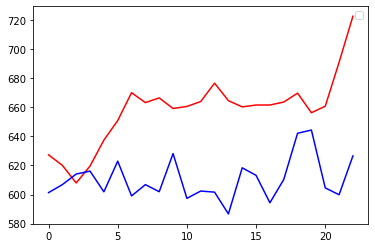

In [45]:
plt.plot(y_test[:,1],color='red')
plt.plot(pred[:,1],color='blue')
plt.legend()
plt.show()

In [38]:
y_test.shape

(23, 3)